In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.ticker import MaxNLocator
import math
from scipy import signal
# from scipy.fftpack import fft, ifft
import scipy.fft
from scipy import ndimage
from scipy.io import loadmat
from scipy.optimize import curve_fit
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def delay(stimulus, tau_y):
    T = np.arange(0,int(tau_y/dt*8))*dt
    Ky = T/tau_y /tau_y *np.exp(-T/tau_y)
    sstm = np.zeros_like(stimulus)
    for i in range(len(Ky)-1):
        for ii in range(i+1):
            sstm[i] += stimulus[ii]*Ky[i-ii]*dt
        sx = np.convolve(stimulus,Ky,'valid')*dt
        sstm[len(Ky)-1:] = sx.copy()
    return sstm

# TK fft+ifft

In [43]:
dt = 0.001
T=np.arange(0,1, dt)
x = np.zeros_like(T)

x[0]=1


beta = 1.2
k = 20.
alpha = 25.
g = 35.
phi = 1.
tau_y=0.03
# x=delay(x, tau_y)

y=np.zeros_like(x)
z=np.zeros_like(x)
for j in range(len(x)-1):
    dy=dt*(-alpha*y[j]+k*(x[j]-phi*z[j]))
    dz=dt*(-beta*z[j]+g*y[j])
    y[j+1]=y[j]+dy
    z[j+1]=z[j]+dz
    
nTK = y/(dt) #normalized by integration

Text(0, 0.5, 'TK(t)')

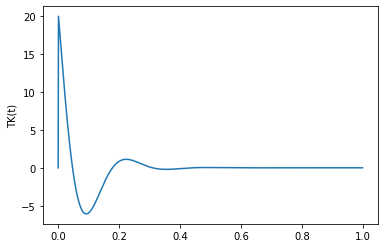

In [44]:
plt.plot(T,nTK)
# plt.plot(T,y)
# plt.plot(T,scipy.fft.ifft(scipy.fft.fft(y)))
plt.ylabel('TK(t)')

In [45]:
# y[k] = np.sum(x * np.exp(-2j * np.pi * k * np.arange(n)/n))
domega = 0.1
omega = np.arange(-1500,1500,domega) #limited by [pi/dt,pi/dt)
TKw = np.sum(nTK[np.newaxis,:]*np.exp(-1j*T[np.newaxis,:]*omega[:,np.newaxis]), axis = 1)*dt

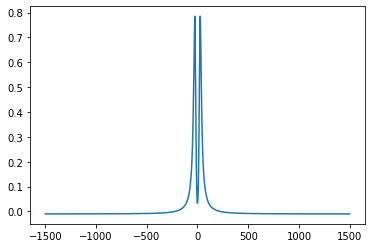

In [46]:
plt.plot(omega, TKw.real)

In [7]:
TKwt = np.sum(TKw[:, np.newaxis]*np.exp(1j*T[np.newaxis,:]*omega[:,np.newaxis]), axis = 0)*domega/(2*np.pi)

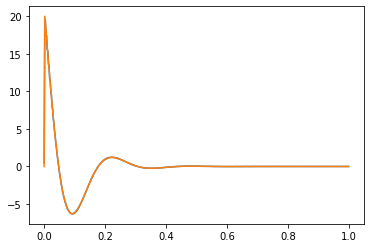

In [8]:
# plt.plot(T,nTK)
plt.plot(T, TKwt)
plt.plot(T,nTK)

In [9]:
# plt.plot(T, TKwt/max(TKwt))
# plt.plot(T, y/max(y))

# H ifft+fft

In [10]:
H = k/(omega*1j+alpha+(k*phi*g/(omega*1j+beta)))#/(omega*1j)

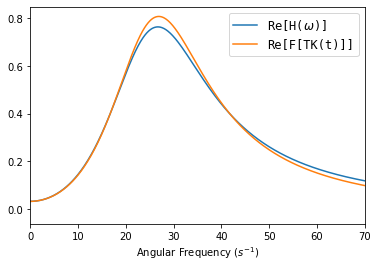

In [40]:
plt.plot(omega, H, label=r'Re[H($\omega$)]')
plt.plot(omega, TKw.real, label=r'Re[F[TK(t)]]')
plt.xlabel(r'Angular Frequency ($s^{-1}$)')
plt.xlim([0,70])
plt.legend(loc='best', prop={'size': 'large', 'family': 'monospace'})

In [12]:
newT = np.append(dt*np.arange(-100,0,1), T)
Ht = np.sum(H[:, np.newaxis]*np.exp(1j*newT[np.newaxis,:]*omega[:,np.newaxis]), axis = 0)*domega/(2*np.pi)

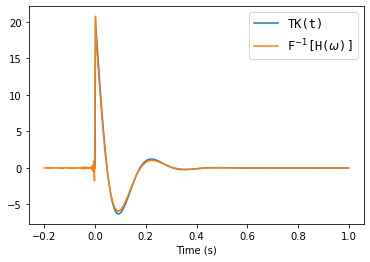

In [35]:
# plt.plot(T, TKwt)
plt.plot(T, nTK, label=r'TK(t)')
plt.plot(newT, Ht, label=r'F$^{-1}$[H($\omega$)]')
plt.xlabel('Time (s)')
# plt.xlim([0,70])
plt.legend(loc='best', prop={'size': 'large', 'family': 'monospace'})

In [14]:
Htw = np.sum(Ht[np.newaxis,:]*np.exp(-1j*newT[np.newaxis,:]*omega[:,np.newaxis]), axis = 1)*dt

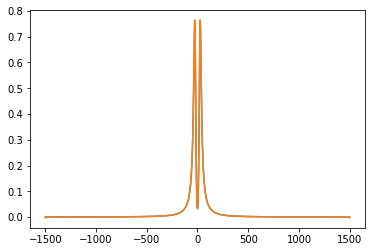

In [15]:
plt.plot(omega, H.real)
plt.plot(omega, Htw.real)
# plt.plot(omega, TKw.real)

# TK with delay fft

In [16]:
dt = 0.002
T=np.arange(0,1, dt)
x = np.zeros_like(T)
x[0]=1

beta = 1.2
k = 20.
alpha = 25.
g = 35.
phi = 1.
tau_y=0.04
x=delay(x, tau_y)

y=np.zeros_like(x)
z=np.zeros_like(x)
for j in range(len(x)-1):
    dy=dt*(-alpha*y[j]+k*(x[j]-phi*z[j]))
    dz=dt*(-beta*z[j]+g*y[j])
    y[j+1]=y[j]+dy
    z[j+1]=z[j]+dz
    
nTKd = y/(dt) #normalized by integration

Text(0, 0.5, 'TK(t)')

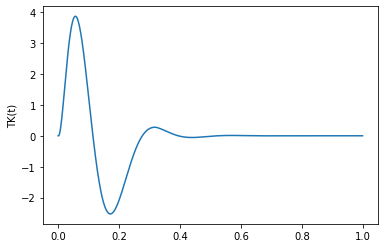

In [17]:
plt.plot(T,nTKd)
# plt.plot(T,y)
# plt.plot(T,scipy.fft.ifft(scipy.fft.fft(y)))
plt.ylabel('TK(t)')

In [18]:
# y[k] = np.sum(x * np.exp(-2j * np.pi * k * np.arange(n)/n))
domega = 0.1
omega = np.arange(-1500,1500,domega) #limited by [pi/dt,pi/dt)
TKdw = np.sum(nTKd[np.newaxis,:]*np.exp(-1j*T[np.newaxis,:]*omega[:,np.newaxis]), axis = 1)*dt

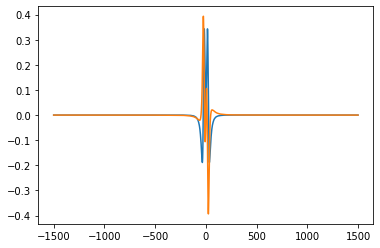

In [19]:
plt.plot(omega, TKdw.real)
plt.plot(omega, TKdw.imag)

(-0.9, 0.2)

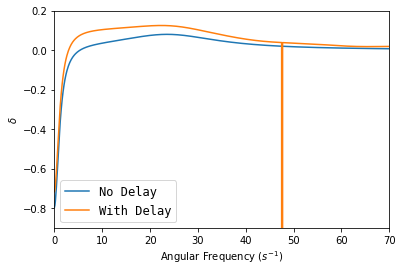

In [41]:
phi = np.angle(H)
delta = -np.append(np.diff(phi),0)/domega
plt.plot(omega, delta, label='No Delay')

phi = np.angle(TKdw)
delta = -np.append(np.diff(phi),0)/domega
plt.plot(omega, delta, label='With Delay')

plt.ylabel(r'$\delta$')
plt.xlabel(r'Angular Frequency ($s^{-1}$)')
plt.legend(loc='best', prop={'size': 'large', 'family': 'monospace'})
plt.xlim([0, 70])
plt.ylim([-0.9, 0.2])

(0, 70)

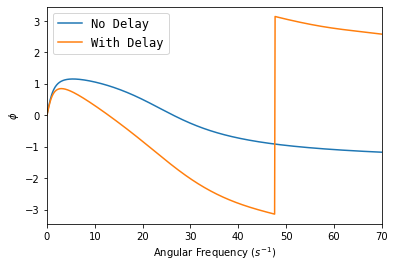

In [42]:
phi = np.angle(H)
delta = -np.append(np.diff(phi),0)/domega
plt.plot(omega, phi, label='No Delay')

phi = np.angle(TKdw)
delta = -np.append(np.diff(phi),0)/domega
plt.plot(omega, phi, label='With Delay')

plt.ylabel(r'$\phi$')
plt.xlabel(r'Angular Frequency ($s^{-1}$)')
plt.legend(loc='best', prop={'size': 'large', 'family': 'monospace'})
plt.xlim([0, 70])
# plt.ylim([-0.9, 0.2])

In [22]:
# np.pi/tau_y

In [23]:
omega[np.argmin(phi)]*tau_y

1.9039999999436987

(-0.9, 0.2)

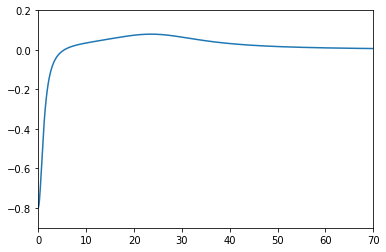

In [24]:
phi = np.angle(H)
delta = -np.append(np.diff(phi),0)/domega
plt.plot(omega, delta)
plt.xlim([0, 70])
plt.ylim([-0.9, 0.2])

## F[conv(TK, Delay)] = F[TK] * F[Delay]

(1499.8999999972716, 14.299999998622752)

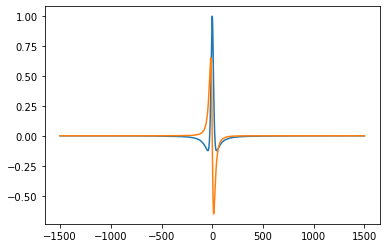

In [25]:
plt.plot(omega, (TKdw/TKw).real)
plt.plot(omega, (TKdw/TKw).imag)
omega[np.argmin(phi)], omega[np.argmin((TKdw/TKw).imag)]

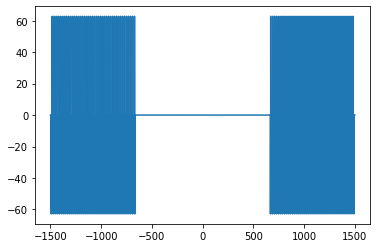

In [26]:
phi = np.angle((TKdw/TKw))
delta = -np.append(np.diff(phi),0)/domega
plt.plot(omega, delta)
# plt.xlim([0, 70])